In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from xgboost import XGBRegressor


Importing the dataset

In [3]:
df = pd.read_csv("BostonHousing.csv")

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

Data Preprocessing
Checking for null values and removing them

In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

We can see then rm column has 5 null values

In [7]:
df.fillna(df['rm'].mean(), inplace=True)
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Using correlation(positive and negative values) to make a heatmap 

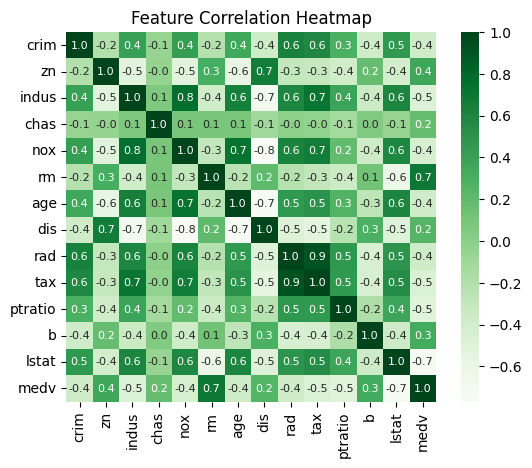

In [21]:
correlation = df.corr()
plt.Figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap="Greens", fmt=".1f", square=True, annot_kws={'size':8})
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# Spliting Data and target

x = df.drop(['medv'] ,axis=1)
y = df['medv']

In [24]:
x_train, x_test , y_train, y_test = train_test_split(x , y, test_size= 0.2 , random_state =42)

In [27]:
model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
x_train_prediction = model.predict(x_train)
print(x_train_prediction)

[11.997135  19.894394  19.40068   13.407645  18.207872  24.603062
 21.093641  24.70416    8.706474  27.49923   20.704855  36.17667
 31.606897  11.68864   39.797474  13.89664   21.78552   23.703417
 17.596834  24.4038     8.78146   19.209234  25.297758  20.442862
 23.099005  37.896152  15.601265  45.398983  15.698032  22.595884
 14.519992  18.705162  17.793888  16.115255  20.602533  31.59947
 29.088503  15.607536  17.540129  22.498363  19.400637  19.290876
  8.498611  20.598064  16.99624   17.10395   14.492339  49.984665
 14.295227  12.620308  28.685389  21.215477  19.306826  23.084948
 19.107004  25.005493  33.403465   4.9984617 29.593594  18.677015
 21.69698   23.090261  22.798122  21.003593  48.79324   14.607919
 16.598526  27.083824  20.097805  19.804016  21.00921   41.29711
 23.166685  20.372456  18.501116  29.394701  36.40516   24.374432
 11.80195   13.800241  12.262243  17.7899    33.085026  26.702303
 13.390102  14.398901  50.00202   21.999966  19.904537  23.790045
 17.526428  1

In [32]:
# R squared error

score_1 = metrics.r2_score(y_train,x_train_prediction)
print('R squared error : ',score_1)

#MAE
score_2 = metrics.mean_absolute_error(y_train , x_train_prediction)
print('Mean Absolute Error: ',score_2)

R squared error :  0.99999798899425
Mean Absolute Error:  0.00907536308364118


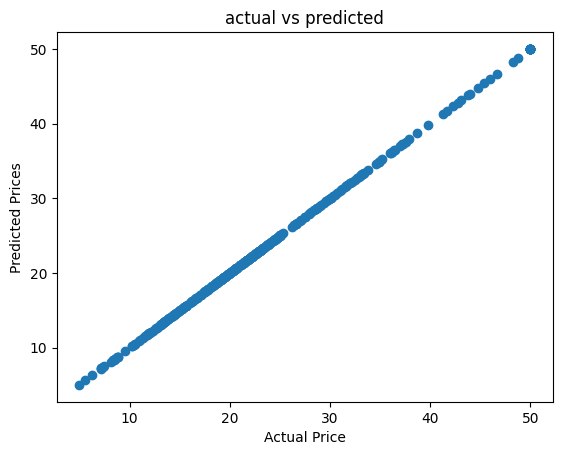

In [33]:
plt.scatter(y_train,  x_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title("actual vs predicted")
plt.show() 

In [35]:
# Accuracy for prediction on test data

test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[24.148684  30.713808  17.933178  21.678999  17.078009  21.501722
 18.60705   14.738712  20.965298  20.960207  22.739906  19.443096
 11.757889  20.923925  20.007368  26.091257  20.520483   9.412945
 45.79149   16.123253  25.151363  25.469803  12.650925  21.058447
 15.405279  15.889944  22.631973  12.962394  20.71014   21.005577
 19.060247  23.05844   16.714323  20.83575   15.173776  15.22186
 34.700443  19.257961  21.80146   23.688463  20.258856  28.53798
 46.87533   19.312675  22.640902  14.990483  14.387882  23.73944
 18.603115  26.067192  21.72953   35.2995    17.098612  27.373476
 46.491974  22.669416  15.962126  31.011978  22.898579  18.478312
 21.819462  34.046455  30.545443  17.285059  26.08982   16.539814
 14.024964  22.56131   27.254501  14.85879   20.263742  31.019222
  9.678348  21.375591  23.640018   7.6282682 20.344444  46.418015
 10.607088  11.780322  23.332634  12.249463  20.063513   9.178055
 19.713346  27.440493  16.548033  23.335417  23.47445   17.76549
 23.495415   7

In [36]:
# R squared error

score_3 = metrics.r2_score(y_test,test_data_prediction)
print('R squared error : ',score_3)

#MAE
score_4 = metrics.mean_absolute_error(y_test , test_data_prediction)
print('Mean Absolute Error: ',score_4)

R squared error :  0.9015764794125712
Mean Absolute Error:  1.958836310517554
